In [22]:
import numpy as np
from scipy.stats import gamma
import random


inf_par = [2.12, 0.69, 2.31]
alpha = inf_par[0] # shape
beta = inf_par[1] # rate
delta = inf_par[2] # shift

# Média da gamma
mean_G = alpha/beta  # 2.12/0.69 = 3.067
# Variância da gamma
var_G = alpha/(beta)**2 # 2.12/(0.69)**2 = 4.4458
# Desvio Padrão da gamma
std_G = np.sqrt(var_G)     # (4.4458)**0.5 = 2.108


runs = 10_000 # Monte Carlo
samples = 1_000 # Amostras randômicas

mean_MC_gamma = []
std_MC_gamma = []

# Teorema do Limite Central
# Distribuição das médias amostrais de qualquer distribuição: é uma normal

random.seed(90) # fixa semente randômica
for i in range(runs): # Monte Carlo
  dist = gamma.rvs(a=alpha, scale=1/beta, size=samples) # gamma randômica
  mean_MC_gamma.append(dist.mean())
  std_MC_gamma.append(dist.std())


meanG = np.array(mean_MC_gamma).mean() # média das médias, coincide com mean_G, como esperado
stdG = np.array(std_MC_gamma).std() # 0.0725  << std_G = 2.108
#stdG = np.array(std_MC_gamma).mean() # 2.108, coincide com std_G, como esperado 


lim_supG = meanG + 2*stdG # IC 95% limite superior
lim_infG = meanG - 2*stdG # IC 95% limite inferior

# Defasagem
lim_supG_d = lim_supG - delta
lim_infG_d = lim_infG - delta
meanG_d = meanG - delta

print('lim_inf_mean (95%) ,       mean        , lim_sup_mean (95%)  ', )
print((lim_infG_d, meanG_d, lim_supG_d))

print(f"{meanG_d.round(3)} ± {(2*stdG).round(3)}, mean IC 95%")


lim_inf_mean (95%) ,       mean        , lim_sup_mean (95%)  
(0.612957720180975, 0.7620905026210463, 0.9112232850611175)
0.762 ± 0.149, mean IC 95%


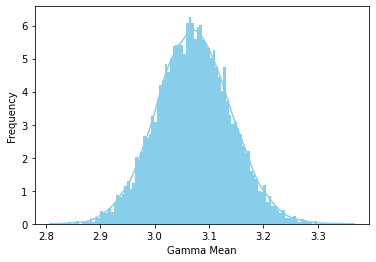

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# MÉDIA
ax = sns.distplot(mean_MC_gamma,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Mean', ylabel='Frequency');


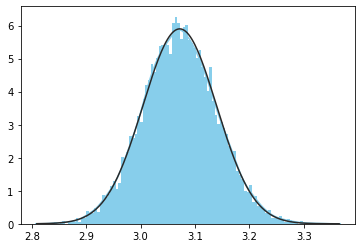

In [24]:
from scipy.stats import norm

# MÉDIA fit NORMAL
# Fita uma normal pra distribuição das médias de runs médias de gammas obtidas do MC
ax = sns.distplot(mean_MC_gamma,
                  fit=norm,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});


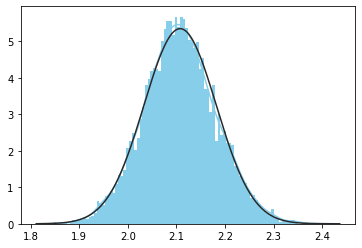

In [25]:
# DESVIO PADRÃO fit NORMAL
# Fita uma normal pra distribuição dos desvios padrões de runs desvios padrões de gammas obtidos do MC
ax = sns.distplot(std_MC_gamma,
                  fit=norm,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});

In [ ]:
from scipy.stats import lognorm


# Fita uma normal pra distribuição das médias de runs gammas obtidas do MC
ax = sns.distplot(mean_MC_gamma,
                  fit=norm,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});


In [9]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins. If unspecified, as reference rule is used
        that tries to find a useful default.
  

Boa tarde Paulo. Tudo bem?
Prazer, sou o Vinícius Fuck, amigo do Vito e estou ajudando um pouco no paper.
Vito falou que você é o cara da estatística. A gente não entende muito disso não.
Se você tiver disponibilidade, poderia esclarecer umas dúvidas?
Obrigado, abraço.

Supondo que eu tenha uma distribuição gamma com três parâmetros obtidos através de uma minimização com uso de LogLikelihood (conforme o paper de He et al, que acho que você conhece): sendo eles: 

```
inf_par = [2.12, 0.69, 2.31]
alpha = inf_par[0]         # shape
beta = inf_par[1]          # rate
delta = inf_par[2]         # shift
```

Se eu quiser calcular a média e desvio padrão dessa gamma, poderia fazer:

```
# Média da gamma
mean_G = alpha/beta             # 2.12/0.69      = 3.067
# Variância da gamma
var_G = alpha/(beta)**2         # 2.12/(0.69)**2 = 4.4458
# Desvio Padrão da gamma
std_G = np.sqrt(var_G)          # (4.4458)**0.5  = 2.108
```

Até aí, com uma única distribuição.
Agora se eu quisesse ver um comportamento "médio" equivalente.

Se eu quiser calcular parâmetros médios dessa distribuição, poderia usar:
1. Simulações de Monte Carlo: por ex: 10 000 com
 1. Amostras randômicas, por ex: 1 000

E aí começam as dúvidas:
Para calcular a média de uma distribuição equivalente a uma distribuição gamma "média":
1. Poderia calcular a média de cada conjunto de 1 000 amostras randômicas
2. E calcular a média de 10 000 simulações dessas médias de cada conjunto


Para calcular o desvio padrão de uma distribuição equivalente a uma distribuição gamma "média":
1. Poderia calcular o desvio padrão de cada conjunto de 1 000 amostras randômicas
2. E calcular o desvio padrão de 10 000 simulações desses desvios padrão de cada conjunto

Dúvida: Calculo duas vezes o **desvio padrão**?

Se eu interpretei corretamente o Teorema do Limite Central: 
"A Distribuição das médias amostrais de qualquer distribuição tende a uma distribuição normal".
Então, tendo esses valores seria como uma distribuição normal aproximada com valores médios da distribuição gamma:
1. Poderia calcular o intervalo de confiança, supondo 95% como:
```
lim_supG = meanG + 2*stdG         # IC 95% limite superior
lim_infG = meanG - 2*stdG         # IC 95% limite inferior
```
2. E depois corrigir com a defasagem de `delta=shift=2.31`
```
# Defasagem
lim_supG_d = lim_supG - delta
lim_infG_d = lim_infG - delta
meanG_d = meanG - delta
```
